### The puprpose of this notebook is to explore Instacart dataset and data visualization

#### First Author: James
#### Second Author: Reshma

#### Description of dataset
* Customer/order Related:
  * Total number of customers
  * number of order_id
  * Top 15 Popularity of item
  * Distribution of number order customers placed 
  * Distribution by department
  * Frequency of number of product in each order 
* Time Related:
  * Timing of shopping by weekdays and hours
  * Transction volumn during a day by hours
  * Transction volumn during a week by days
  * How frequent do users place an order
* Product Related:
  * Similar item related (Department --> Aisle --> Product) 
  * bin the same category (for example: types of bread in the breakfast category) 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
color = sns.color_palette()

In [2]:
filePath = 'Capstone/Datasets/instacart_online_grocery_shopping_2017_05_01/instacart_dataset.csv'
df       = pd.read_csv(filePath,index_col=0)

In [4]:
df['Department'] = df['department'].apply(lambda x : x.capitalize())
df['Aisle']       = df['aisle'].apply(lambda x : x.capitalize())

In [5]:
df.drop(['department', 'aisle'], axis=1, inplace=True)

## Customers and orders related 

#### Average size of the basket of user in each purchase: 
   * Distribution of number order users placed 

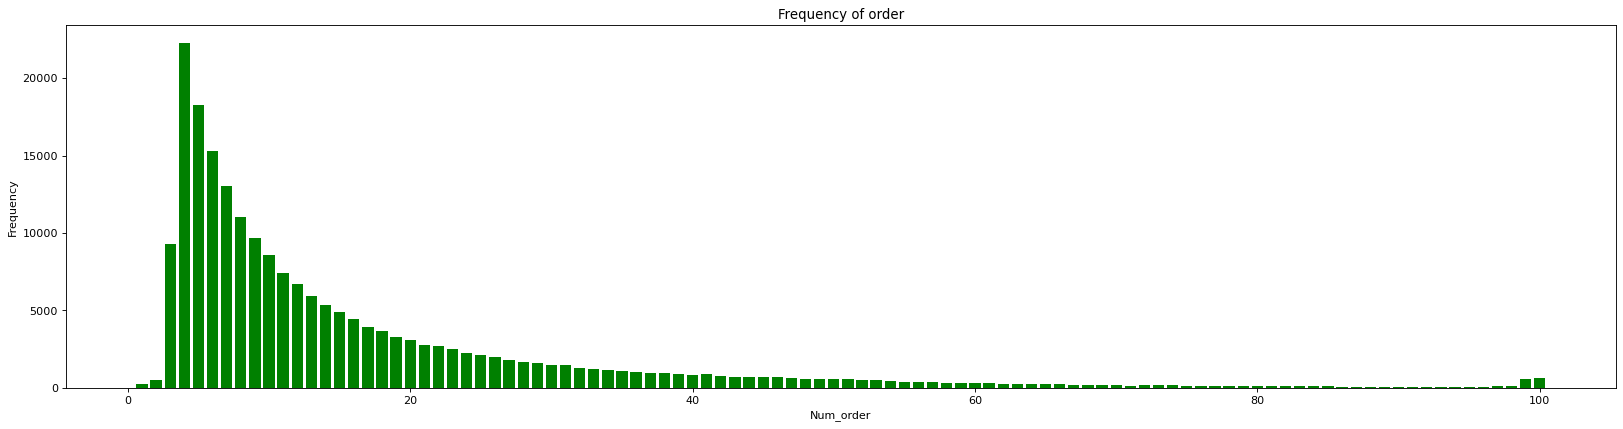

In [7]:
df_user_order         = pd.DataFrame(df.groupby("user_id")["order_id"].nunique()).reset_index()
df_user_order.columns = ["users","num_of_order"]
df_user_order         = df_user_order.groupby("num_of_order").count().reset_index()
plt.figure(num=None, figsize=(25, 6), dpi=80, facecolor='w', edgecolor='k')
plt.bar(df_user_order.num_of_order,df_user_order.users,color = 'g')
plt.title('Frequency of order')
plt.xlabel('Num_order')
plt.ylabel('Frequency')
plt.show()

In [8]:
df_user_order = df_user_order[df_user_order['num_of_order']>0]

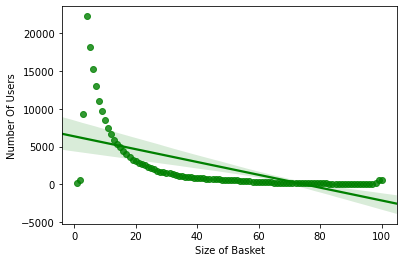

In [9]:
df_user_order.columns = ['Size of Basket', 'Number Of Users']
g = sns.regplot(x="Size of Basket", y="Number Of Users", data= df_user_order,
                  color="g")

#### Top 15 popular items based on number of times of purchase

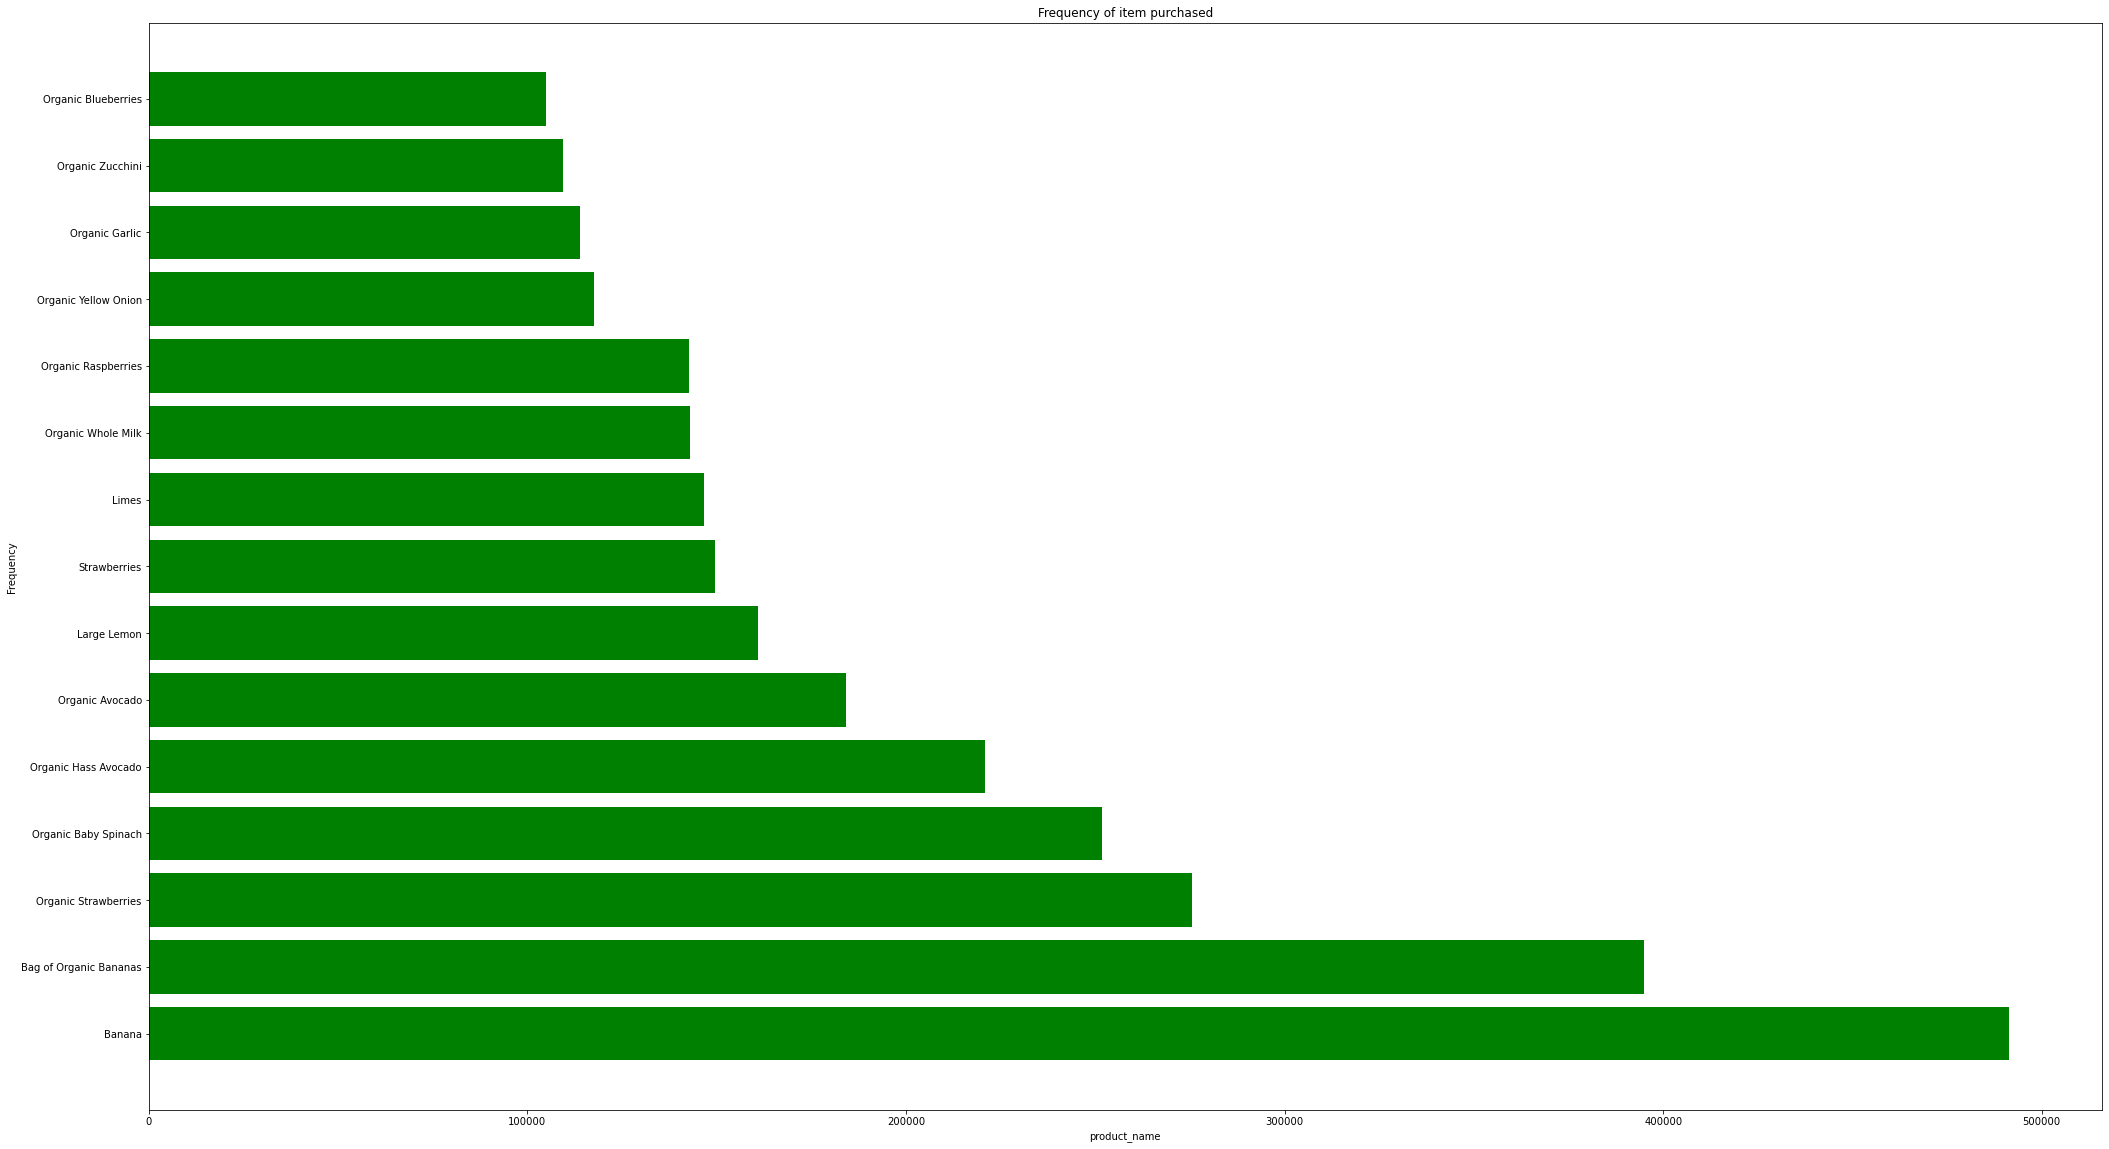

In [11]:
df_pop         = pd.DataFrame(df.groupby("product_name")["order_id"].count()).reset_index()
df_pop.columns = ["product_name","num_purchase"]
df_pop         = df_pop.sort_values("num_purchase",ascending=False).head(15)
plt.figure(num=None, figsize=(35, 20), facecolor='w', edgecolor='k')
plt.barh(df_pop.product_name,df_pop.num_purchase,color = 'g')
plt.title('Frequency of item purchased')
plt.xlabel('product_name')
plt.ylabel('Frequency')
plt.show()

#### Distribution of departments 

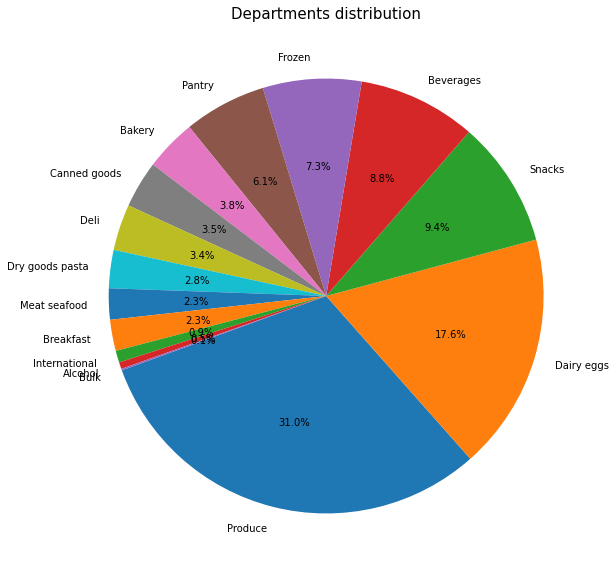

In [13]:
plt.figure(figsize=(10,10))
temp_series = df['Department'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()

#### Distribution of departments along with reorder status of food items

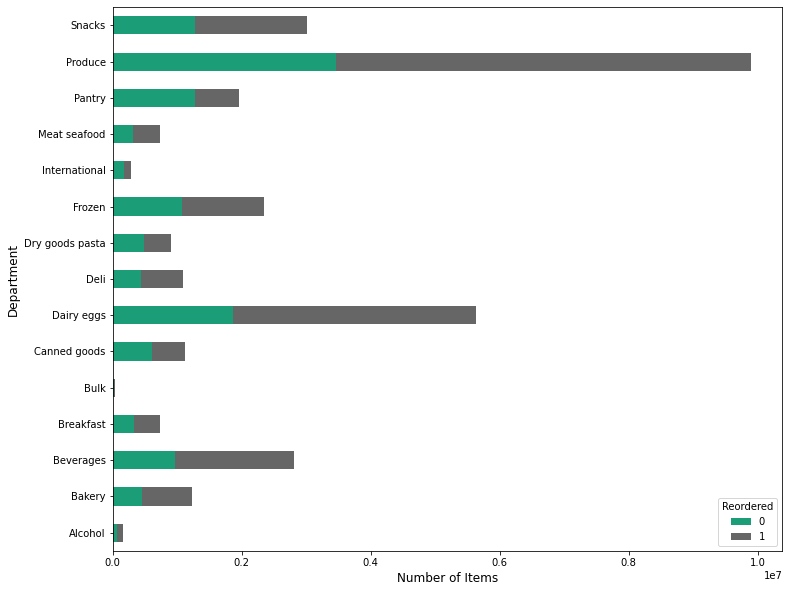

In [16]:
df_dept_reorder =df[['Department','reordered']]
ct = pd.crosstab(df.Department, df.reordered)
ct.plot.barh(stacked=True, figsize=(12, 10), colormap='Dark2')
plt.legend(title='Reordered')
plt.ylabel('Department', fontsize=12)
plt.xlabel('Number of Items', fontsize=12)
plt.show()
plt.show()

#### Frequency of number of product in each order 

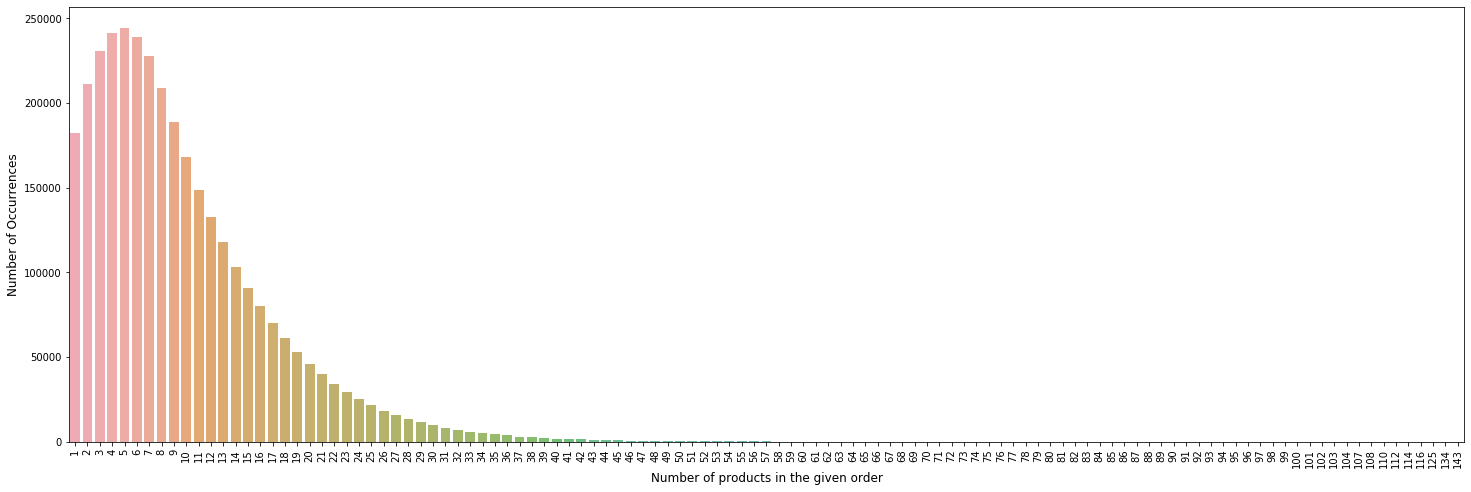

Mode of number of prodcuts purchased in each order is 5


In [124]:
grouped_df = df.groupby("order_id")["new_add_to_cart_order"].aggregate("max").reset_index()
cnt_srs = grouped_df.new_add_to_cart_order.value_counts()
plt.figure(figsize=(25,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of products in the given order', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()
print("Mode of number of prodcuts purchased in each order is {}".format(grouped_df.new_add_to_cart_order.mode()[0]))

## Time related 

#### Timing of shopping by weekdays and hours

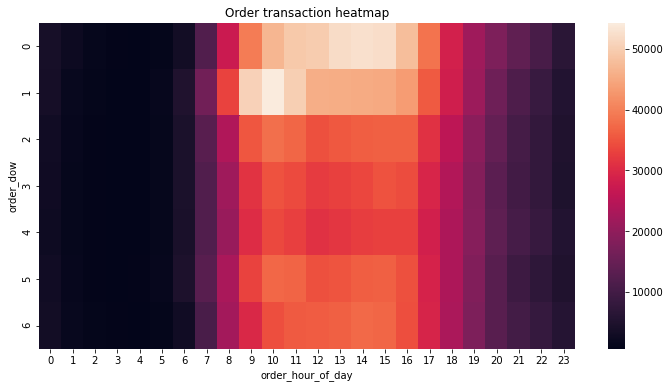

In [58]:
grouped_df = df.groupby(["order_dow", "order_hour_of_day"])["order_id"].nunique().reset_index()
grouped_df = grouped_df.pivot(index = 'order_dow', columns = 'order_hour_of_day', values= 'order_id')
plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Order transaction heatmap")
plt.show()

#### Timing of shopping by weekdays and hours - Aggregated to certain time intervals

In [113]:
grouped_df = df.groupby(["order_dow", "order_hour_of_day"])["order_id"].nunique().reset_index()

In [114]:
def get_hod(hour):
    if hour in range(0, 6):
        return 0 #('12am-5am')
    elif hour in range(6, 9):
        return 1 #('6am-8am')
    elif hour in range(9, 13):
        return 2 #('9am-noon')
    elif hour in range(13, 16):
        return 3 #('noon-3pm')
    elif hour in range(16, 19):
        return 4 #('4pm-6pm')
    elif hour in range(19, 22):
        return 5 #('7pm-9pm')
    else:
        return 6 #('9pm-12am')

In [115]:
grouped_df['order_hour_of_day'] = grouped_df['order_hour_of_day'].apply(lambda x : get_hod(x))

In [116]:
heat_df = grouped_df.groupby(['order_dow', 'order_hour_of_day'])['order_id'].sum().reset_index()

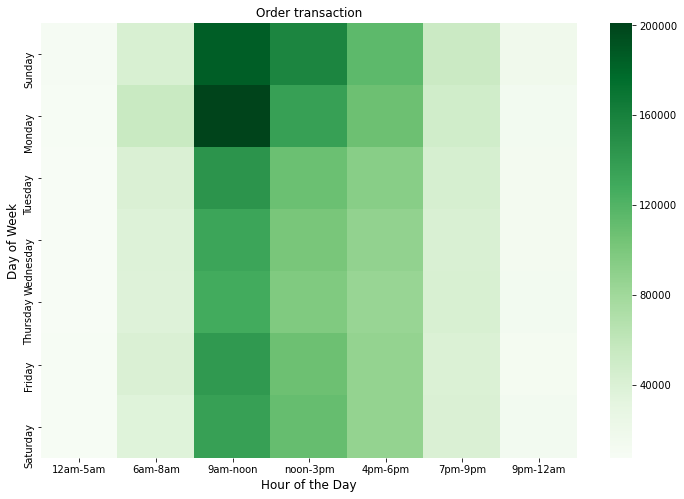

In [118]:
heat_pivot = heat_df.pivot(index ='order_dow', columns = 'order_hour_of_day', values= 'order_id')
plt.figure(figsize=(12,8))
xticks = ['12am-5am','6am-8am','9am-noon','noon-3pm', '4pm-6pm', '7pm-9pm', '9pm-12am']
yticks = ["Sunday", "Monday","Tuesday","Wednesday","Thursday","Friday", "Saturday"]
sns.heatmap(heat_pivot, cmap="Greens", yticklabels=yticks, xticklabels=xticks)
plt.title("Order transaction")
plt.ylabel('Day of Week', fontsize=12)
plt.xlabel('Hour of the Day', fontsize=12)
plt.show()

#### Transaction volumn during a day by hours 

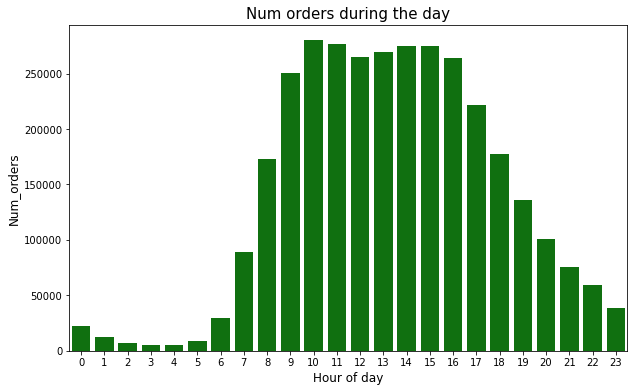

In [125]:
df_hr = df.groupby(["order_hour_of_day"])["order_id"].nunique().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(df_hr['order_hour_of_day'].values, df_hr['order_id'].values, color='g')
plt.ylabel('Num_orders', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.title("Num orders during the day", fontsize=15)
plt.show()

#### Transaction volumn during a week by days

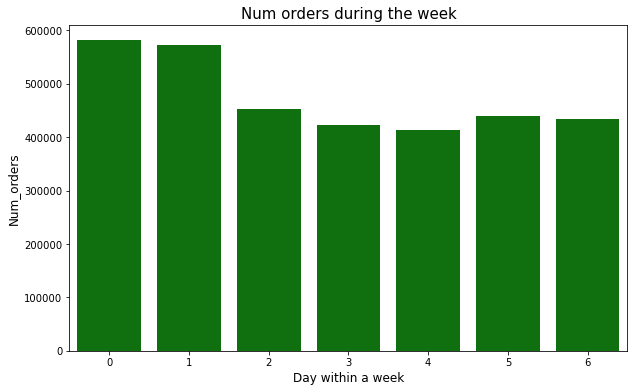

In [126]:
df_week = df.groupby(["order_dow"])["order_id"].nunique().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(df_week['order_dow'].values, df_week['order_id'].values, color='g')
plt.ylabel('Num_orders', fontsize=12)
plt.xlabel('Day within a week', fontsize=12)
plt.title("Num orders during the week", fontsize=15)
plt.show()

#### Frequent purchase of customers 

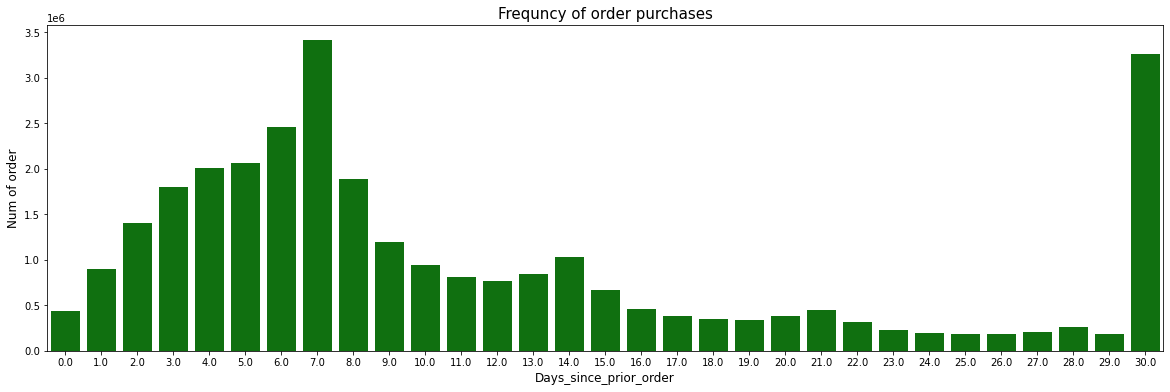

In [127]:
df_freq = pd.DataFrame(df.days_since_prior_order.value_counts()).reset_index()
plt.figure(figsize=(20,6))
sns.barplot(df_freq['index'].values, df_freq['days_since_prior_order'].values, color='g')
plt.ylabel('Num of order', fontsize=12)
plt.xlabel('Days_since_prior_order', fontsize=12)
plt.title("Frequncy of order purchases", fontsize=15)
plt.show()

## Product related 

In [130]:
print(set(df.Aisle))
print(set(df.Department))
print("Number of unique aisle is {}".format(len(set(df.Aisle))))
print("Number of unique department is {}".format(len(set(df.Department))))

{'Salad dressing toppings', 'Ice cream toppings', 'Energy granola bars', 'Fresh vegetables', 'Candy chocolate', 'Spirits', 'Red wines', 'Lunch meat', 'Specialty wines champagnes', 'Preserved dips spreads', 'Frozen produce', 'Fresh dips tapenades', 'Fruit vegetable snacks', 'Spices seasonings', 'Latino foods', 'Butter', 'Pasta sauce', 'Tortillas flat bread', 'Mint gum', 'Ice cream ice', 'Granola', 'Oils vinegars', 'Chips pretzels', 'Water seltzer sparkling water', 'Frozen juice', 'Yogurt', 'Frozen meat seafood', 'Frozen breakfast', 'Other creams cheeses', 'Soup broth bouillon', 'Spreads', 'Packaged seafood', 'Refrigerated pudding desserts', 'Fresh pasta', 'Soy lactosefree', 'Fresh fruits', 'Packaged cheese', 'Canned meat seafood', 'Marinades meat preparation', 'Asian foods', 'Canned fruit applesauce', 'Breakfast bakery', 'White wines', 'Packaged meat', 'Frozen appetizers sides', 'Tea', 'Poultry counter', 'Baking ingredients', 'Juice nectars', 'Canned jarred vegetables', 'Dry pasta', 'Co

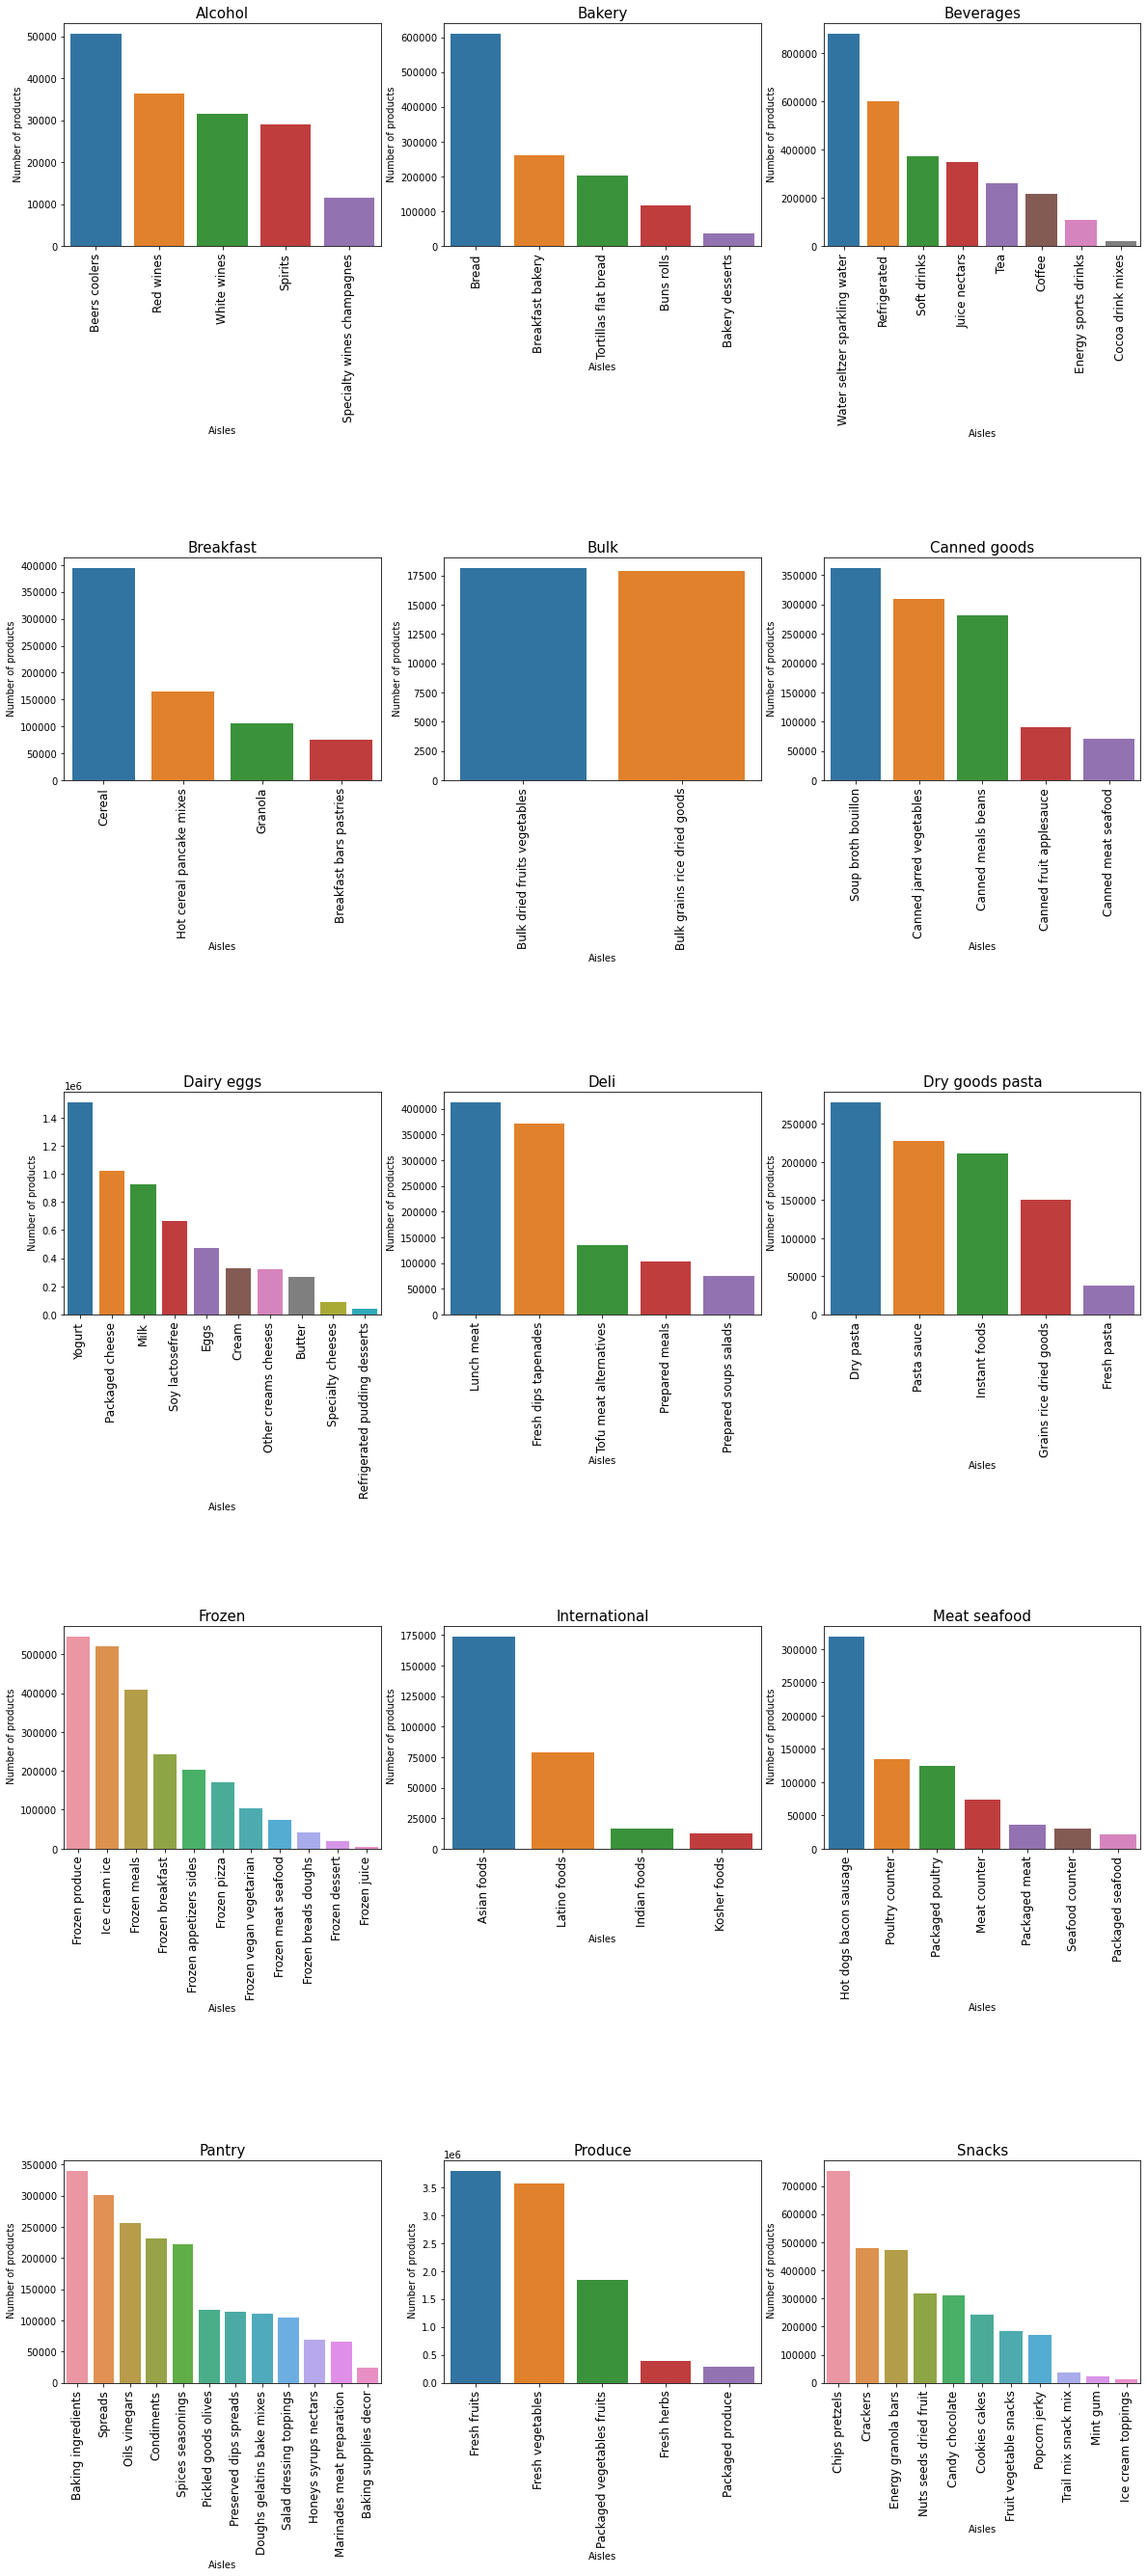

In [134]:
df_item = df.groupby(["Department", "Aisle"])["product_id"].count().reset_index()
df_item.sort_values(by='product_id', ascending=False, inplace=True)
fig, axes = plt.subplots(5,3, figsize=(20,45), gridspec_kw =  dict(hspace=1.4))
for (aisle, group), ax in zip(df_item.groupby(["Department"]), axes.flatten()):
    g = sns.barplot(group.Aisle, group.product_id , ax=ax)
    ax.set(xlabel = "Aisles", ylabel=" Number of products")
    g.set_xticklabels(labels = group.Aisle,rotation=90, fontsize=12)
    ax.set_title(aisle, fontsize=15)

#### Capture Popularity of food items

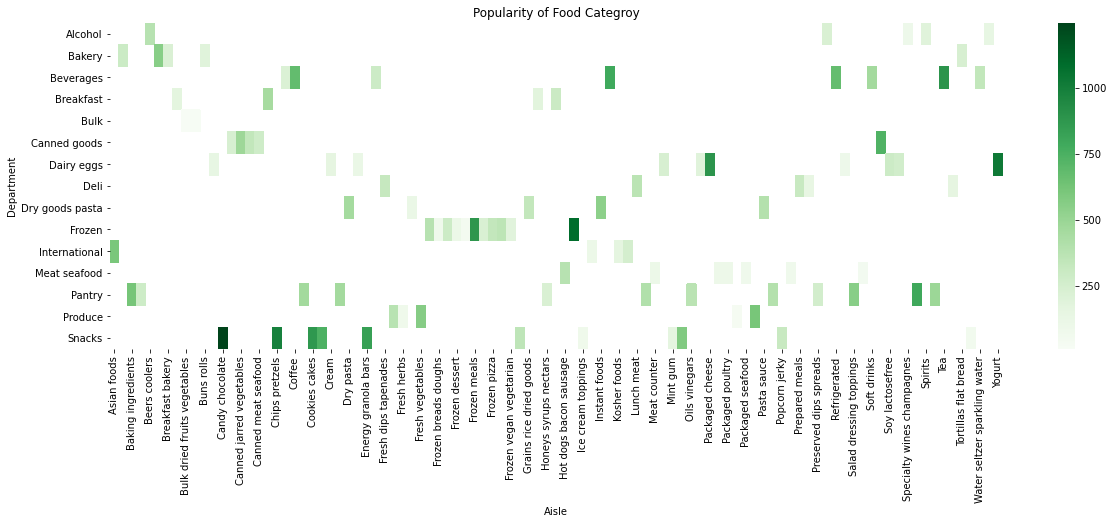

In [137]:
df_prod_name = df.groupby(["Department","Aisle"])["product_name"].nunique().reset_index()
df_prod_name = df_prod_name.pivot(index = 'Department', columns = 'Aisle', values= 'product_name')
plt.figure(figsize=(20,6))
sns.heatmap(df_prod_name, cmap="Greens")
plt.title("Popularity of Food Categroy")
plt.show()

#### Unique food items

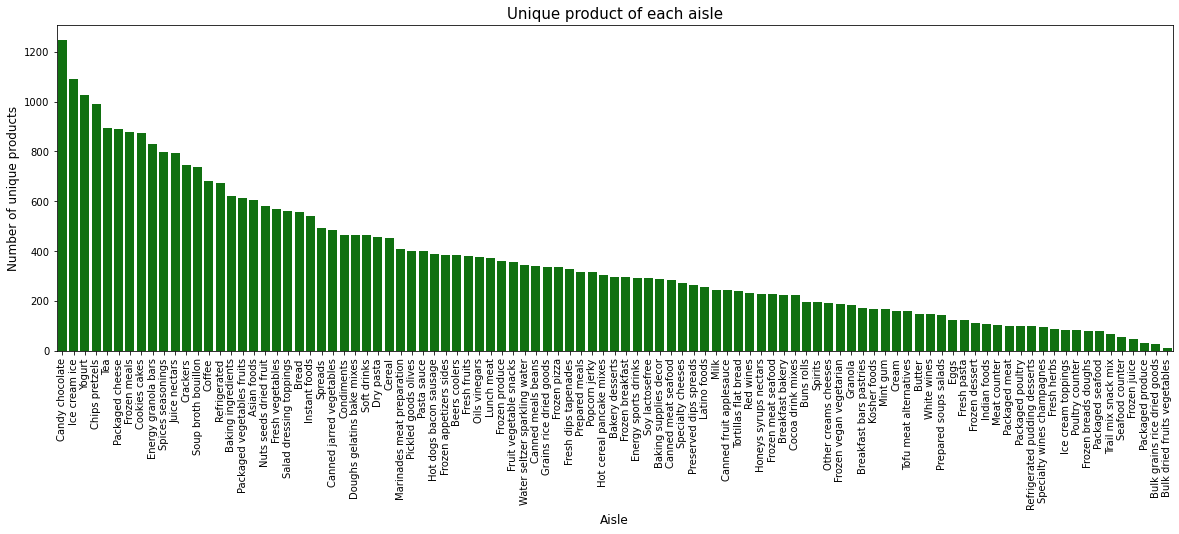

In [139]:
df_prod = df.groupby(["Aisle"])["product_name"].nunique().reset_index()
df_prod = df_prod.sort_values(by = "product_name", ascending = False)
plt.figure(figsize=(20,6))
sns.barplot(df_prod['Aisle'].values, df_prod['product_name'].values, color='g')
plt.ylabel('Number of unique products', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation=90)
plt.title("Unique product of each aisle", fontsize=15)
plt.show()